<a href="https://colab.research.google.com/github/aiadasaad246/JPEG-Algo/blob/main/JPEG_Algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JPEG Algorithm 

# By
## Aiad Asaad 201700790

# Introduction

**Image compression is an important field specialy in this era. There are many tiquniques avalible nowaday. Some algorithems are lossless in which you will receive the image in its original quality. Others are lossy which mean the quality of the received  image will be not the same as the original one. Lossless compression is preferred for archival purposes and often for medical imaging, technical drawings, clip art, or comics. While Lossy compression methods are especially suitable for natural images such as photographs in applications where minor. In the next steps, I will try to implement JPEG Algorithm to compress images. This one is a lossy algorithm**

# Theory

**The first step, A dct_spectrum function is implemimented to take an 8*8 pexils from the image and quntize it. Then I convert the block to 1-D array. Affter that Run length encoder is implemented to compress the image by removeing the sequenses of zeros and put a zero and the number of the sequence instead. Then more compression is performed by the Huffman Encoder.Finnaly we will just need to send the size of the image and the Haffman dictionary and the output of the encoder**

# Spesifications 

***First I will target a compression ratio 10:1 (Original:compressed) <br>
I will try to have a good quality. I will use the  Structural Similarity Index Matix (SSIM) to measue the quality.<br> Therefore I will target an SSIM of 0.85***

# Code & Implementation 

**Import libraries**

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import IPython
from IPython.display import Image
import math
from math import cos,sqrt,pi
import matplotlib.image as mpimg
import cv2  
import numpy 
from PIL import Image
from numpy import asarray
from skimage.measure import compare_ssim
import argparse
import imutils
import warnings
warnings.filterwarnings('ignore')
from math import ceil,log

In [ ]:
#To display all image in gray-scale
plt.gray();


<Figure size 432x288 with 0 Axes>

In [ ]:
#DCT and Quantization For 8*8 block
def dct_spectrum(image8_8):
    #To store one basis function 
    one_basis=np.zeros((8,8))
    #To store the final DCT
    f = np.zeros((8,8))
    for u in range(0, 8):
        for v in range(0, 8):
            for x in range(0, 8):
                for y in range(0, 8):
                    #Calculate one basis for a certian v and u
                     one_basis[x,y]=cos(((2*x+1)*(u*pi))/16) * cos(((2*y+1)*(v*pi))/16)
            #Multiply each basis by the image then store the sum of the rows and columns on the corresponding index
            f[u,v]=sum(sum(image8_8*one_basis))
            if u==0 and v==0:
                f[u,v]= f[u,v]/64
            elif u==0 or v==0:
                f[u,v]= f[u,v]/32
            else:
                f[u,v]=f[u,v]/16 
                
    #Applying the Quantization For the final block    
    f=(f/quntization).round()


    return f


In [ ]:
#IDCT and unquantization for 8*8 block
def idct_spectrum(f):
    
    #Unquantization 
    f=(f*quntization)
    #To store one basis function 
    one_basis=np.zeros((8,8))
    #To store the final 8*8 image
    image8_8 = np.zeros((8,8))
    for u in range(0, 8):
        for v in range(0, 8):
            for x in range(0, 8):
                for y in range(0, 8):
                    #Calculate one basis for a certian v and u
                     one_basis[x,y]=cos(((2*x+1)*(u*pi))/16) * cos(((2*y+1)*(v*pi))/16)
            #Multply each DCT coefficient by the corresponding basis function and sum all together in 8*8 block
            image8_8=image8_8+f[u,v]*one_basis

    
    return image8_8.round()

In [ ]:
#This code Is Aknowledged from Geeks for Geeks 
def zgzag(matrix):
    #Number of rows
    rows=np.size(matrix,0)
    #Number of columns
    columns=np.size(matrix,1)
    #To store the 1-D array
    zegzag=[]
    #To store the element of the matrix ordered  according to the zigzag shape
    solution=[[] for i in range(rows+columns-1)] 
    for i in range(rows): 
        for j in range(columns):
            sum=i+j 
            if(sum%2 ==0): 
            #add at beginning 
                solution[sum].insert(0,matrix[i][j]) 
            else: 
              #add at end of the list 
                solution[sum].append(matrix[i][j])     
    for i in solution: 
        for j in i: 
            zegzag.append(j)
    return zegzag

In [ ]:
#Runlength
def Run_Len_code_Encoder(q):
    c=0
    #To store the final out
    l=[]
    for i in range(len(q)):
        #Put the element in the final out if it is not 0
        if q[i]!=0:
            l.append(q[i])
        
        #If it is the first 0 put it and increast the counter
        if q[i]==0 and c==0:
            l.append(q[i])
            c=c+1
        #This is a handler to avoid errors if the q[i+1] our od the scope legth
        try:
            #if it is the last zero put the count of zeros and rest the counter
            if q[i]==0 and c!=0 and q[i+1]!=0:
                l.append(numpy.float64(c))
                c=0
            #if it is a zero and the following element is also zero increase the counter
            if q[i]==0 and c!=0 and q[i+1]==0:
                c=c+1
        except:
            #This happend if there is a zero in the end of the list
            if q[i]==0:
                l.append(numpy.float64(c))
                c=0
                
    return l

In [ ]:
#This code Is Aknowledged from Geeks for Geeks
def inverse_zigzag(input,vmax,hmax):

    h = 0
    v = 0
    vmin = 0
    hmin = 0
    #vmax=8
    #hmax=8

    output = np.zeros((vmax, hmax))

    i = 0
    #----------------------------------
    while ((v < vmax) and (h < hmax)): 
        #print ('v:',v,', h:',h,', i:',i)   	
        if ((h + v) % 2) == 0:                 # going up
            
            if (v == vmin):
                #print(1)
                output[v, h] = input[i]        # if we got to the first line
                if (h == hmax):
                    v = v + 1
                else:
                    h = h + 1                        
                i = i + 1

            elif ((h == hmax -1 ) and (v < vmax)):   # if we got to the last column
                #print(2)
                output[v, h] = input[i] 
                v = v + 1
                i = i + 1

            elif ((v > vmin) and (h < hmax -1 )):    # all other cases
                #print(3)
                output[v, h] = input[i] 
                v = v - 1
                h = h + 1
                i = i + 1
        else:                                    # going down

            if ((v == vmax -1) and (h <= hmax -1)):       # if we got to the last line
                #print(4)
                output[v, h] = input[i] 
                h = h + 1
                i = i + 1
        
            elif (h == hmin):                  # if we got to the first column
                #print(5)
                output[v, h] = input[i] 
                if (v == vmax -1):
                    h = h + 1
                else:
                    v = v + 1
                i = i + 1
            elif((v < vmax -1) and (h > hmin)):     # all other cases
                output[v, h] = input[i]
                v = v + 1
                h = h - 1
                i = i + 1
        if ((v == vmax-1) and (h == hmax-1)):          # bottom right element
            #print(7)       
            output[v, h] = input[i] 
            break
    return output

In [ ]:
def Run_Len_code_Decoder(q):
    #Store the final out
    l=[]
    for i in range(len(q)):
        #if the element is zero 
        if q[i]==0:
            #This is a handler to avoid errors if the q[i+1] our od the scope legth
            try:
                #Then the number of zeros is the next element
                c=q[i+1]
                #This is the index of the next element
                index=i+1
                #add zeros acourding to the counter
                for j in range(int(c)):
                    l.append(0)
            except:
                dpnthon=0

        if q[i]!=0:
            try:
                #This is the counter of the zeros so we do not need it
                if q[i-1]==0:
                    a="Do no thing"
                else:
                    #to append the rest elements
                    l.append(q[i])
            except:
                FirstElement="Error Handleing"
    return l    

In [ ]:
def hufman_Dictionary(a):
    #The set to store the unique values only
    v=set(a)
    l=list(v)
    #This dictionay to store the letters with the corresponding probabilety
    oc={}
    for i in l:
        for j in a:
            #Count the number of occurance of each letter
            oc[i]=a.count(i)
    for i in oc:
        #calculate the probabilety of each letter
        oc[i]=(oc[i])/len(a)  
    #This is a class to create nodes of the huffman tree
    import numpy
    class NodeTree(object):
        #This is the constractor . it will have the left and the right branch
        def __init__(self, left=None, right=None):
            self.left = left
            self.right = right
        ##This is a function to return the the left and the right child of any node of the tree
        def children(self):
            return (self.left, self.right)
    #This is a function to encode a huffman tree
    def huffman_code_tree(node, left=True, binString=''):
        #This is a stop condition happens when the child is a leaf (Symbol)
        if type(node) is numpy.float64:
            return {node: binString}
        (l, r) = node.children()
        d = dict()
        #Recursively assigning bits to the left and right branch
        d.update(huffman_code_tree(l, True, binString + '0'))
        d.update(huffman_code_tree(r, False, binString + '1'))
        return d
    #sort dictionary of letters and probabilites discendingly
    nodes = sorted(oc.items(), key=lambda x: x[1], reverse=True)
    #Constructing the huffman tree
    while len(nodes) > 1:
        (sym1, p1) = nodes[-1]
        (sym2, p2) = nodes[-2]
        nodes = nodes[:-2]
        node = NodeTree(sym1, sym2)
        nodes.append((node, p1 + p2))
        nodes = sorted(nodes, key=lambda x: x[1], reverse=True)
    root=nodes[0][0]
    huffmanCode = huffman_code_tree(root)
    d=huffmanCode
    return d
def huffman_Encoder(d,a):
    f=[]
    for i in range(len(a)):
        f.append(d[a[i]])
    return f
def huffman_Decoder(d,f):
    def rev(d):
        reversed_dictionary = {value : key for (key, value) in d.items()}
        return reversed_dictionary
    x=rev(d)
    w=[]
    for i in range(len(f)):
        w.append(x[f[i]])
    return w
 
    

In [ ]:
#This is the JPEG ENCODER ALGO 
#IF YOU want to compress an image just write the name with the extention and put c=1 
#If you have already red  the image write the variable name of the image or any matrix and put c==2
def jpeg_encoder(img,c):
    #If the user input the image as a file 
    if c==1:
        image=mpimg.imread(img)
    #If the user input the image as a matrix
    if c==2:
        image=img
    H = np.size(image, 0)
    W = np.size(image, 1)
    # Convert to gray-scale image
    try:
        if np.size(image, 2) > 0:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    except:
        print("The image is already gray-scale")
    #make the hight and wedth of the image a multiple of 8 by cutting the image 
    if H % 8 != 0:
        H=H-(H%8)
        image=cv2.resize(image,(W,H))
    if W % 8 != 0:
        W=W-(W%8)
        image=cv2.resize(image,(W,H))
    #Store the hight and the width of the image to send them to the decoder
    w=np.size(image,1)
    h=np.size(image,0)
    print(h,w)
    #Show the image before encoding
    plt.matshow(image);
    
    #DCT AND QUANTIZATION OVER ALL THE IMAGE 
    #to store huffman dictionary and send it to the decoder
    d=[]
    # to store the image affter applying the encoding (dct,huffman,run_length)
    huffman=[]
    
    #Store all the 1-D array in a list od arrays
    ONE_D=[]
    Run_Len=[]
    huffman=[]
    c=0
    #To store the DCTs
    img = np.zeros((np.size(image,0),np.size(image,1)))
    #1-Divide the image to 8*8 Blocks
    for i in range(0,np.size(image,0),8):
        for j in range(0,np.size(image,1),8):
            #2- Perform DCT on each block & 3- Perform the quantization step per 8x8 block
            img[i:i+8,j:j+8]=dct_spectrum(image[i:i+8,j:j+8])
            a= img[i:i+8,j:j+8]
            #4-Transform each block from 2-D into 1-D vector & 5- Use run-length encoding to compress the stream of zeros
            Run_Len.append(Run_Len_code_Encoder(zgzag(a)))
            #6-Use Huffman function encode the final stream into a further compressed bit stream
            d.append(hufman_Dictionary(Run_Len[c]))
            huffman.append(huffman_Encoder(d[c],Run_Len[c]))
            c=c+1

    return huffman,d,h,w,image

#This is the JPEG DECODER ALGO 
#IT take the Huffman encoder and dectionary Also the size of the image
def jpeg_decoder(huffman,d,h,w):
    #Huffman Decoder
    dehuffman=[]
    for i in range(len(huffman)):
        #7- Use Huffman decoder function to decode the stream
        dehuffman.append(huffman_Decoder(d[i],huffman[i]))
        
    one_d=[]
    for i in dehuffman:
        #8-Perform run-length decoding
        one_d.append(Run_Len_code_Decoder(i))
    
    count=0
    imgf = np.zeros((h ,w))
    for i in range(0,h,8):
        for j in range(0,w,8):
            # 9-Transform the 1-D vector into groups of 8x8 (inverse_zigzag)
            #10- Multiply each group by the quantization & 11- Perform IDCT  (idct_spectrum)
            #12- Combine the 8x8 pixel groups (imgf)
            imgf[i:i+8,j:j+8]=idct_spectrum(inverse_zigzag(np.array(one_d[count]),8,8))
            count=count+1

    return imgf

### **Important Note**
***I used many tables till I find this one which achieves the specification in a very good way***

# Table1

In [ ]:
quntization=[  [8,  8,  8,  8,  8,  8,  6,  7],
              [8,  8,  1,  8,  8,  6,  7,  4],
              [8,  8,  1,  1,  6,  7,  4,  10],
              [8,  8,  1,  6,  7,  4,  5,  10],
              [8,  8,  6,  7,  4,  5,  8,  10],
              [1,  6,  7,  4,  5,  8,  9,  11],
              [6,  7,  4,  7,  6,  9,  10,  10],
              [7,  4,  5,  8,  10,  11,  12,  12]]

3744 2992


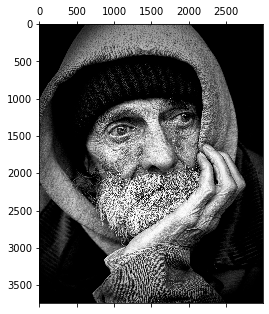

In [ ]:
Huffman,Dictionary,hight,width,image=jpeg_encoder("qq.jpg",1)

In [ ]:
a=jpeg_decoder(Huffman,Dictionary,hight,width)

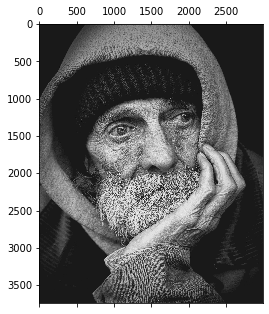

In [ ]:
plt.matshow(a);

**Compresion Ratio**

In [ ]:
c1=0
for i in Huffman:
    c1+=len(i)
c2=0
for j in Dictionary:
    c2+=len(j)
Huffman_bits=c1+c2
Image_size_bits=hight.bit_length()+width.bit_length()

In [ ]:
Comprissed=Image_size_bits+Huffman_bits
Comprissed=(Comprissed)/(1024*1024*8)
print("the size of the Compressed Image={:0.5f} KB".format(Comprissed*1024))

the size of the Compressed Image=555.45398 KB


In [ ]:
Original=hight*width*8 
Original= (Original)/(1024*1024*8)
print("the size of the Original Image={:0.5f} KB".format(Original*1024))

the size of the Original Image=10939.50000 KB


**The Algorithem commpressed the image from 48.75 KB to 2.6178 KB 
Which is about 10:0.5 ( achieve specifcs)**

**Quality**

In [ ]:
(score, diff) = compare_ssim(a, image, full=True)
diff = (diff * 255).astype("uint8")

# 6. You can print only the score if you want
print("SSIM: {}".format(score))

SSIM: 0.8139911693276762


**This does not acieve the specifcs**

# Table 2

In [ ]:
quntization=[  [16,  11,  10,  16,  24,  40,  51,  61],
              [12,  12,  14,  19,  26,  58,  60,  55],
              [14,  13,  16,  24,  40,  57,  69,  56],
              [14,  17,  22,  29,  51,  87,  80,  62],
              [18,  22,  37,  56,  68, 109, 103,  77],
              [24,  35,  55,  64,  81, 104, 113,  92],
              [49,  64,  78,  87, 103, 121, 120, 101],
              [72,  92,  95,  98, 112, 100, 103,  99]]

152 312


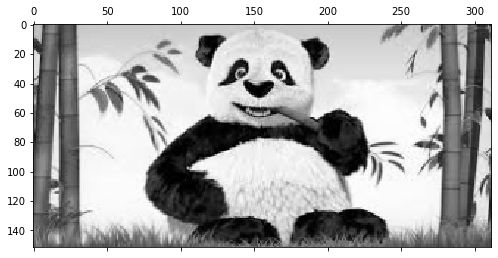

In [ ]:
Huffman,Dictionary,hight,width,image=jpeg_encoder("images.jpg",1)

In [ ]:
a=jpeg_decoder(Huffman,Dictionary,hight,width)

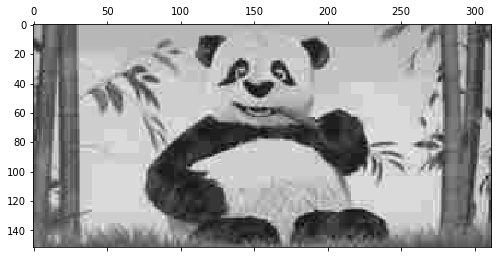

In [ ]:
plt.matshow(a);

**Compresion Ratio**

In [ ]:
c1=0
for i in Huffman:
    c1+=len(i)
c2=0
for j in Dictionary:
    c2+=len(j)
Huffman_bits=c1+c2
Image_size_bits=hight.bit_length()+width.bit_length()

In [ ]:
Comprissed=Image_size_bits+Huffman_bits
Comprissed=(Comprissed)/(1024*1024*8)
print("the size of the Compressed Image={:0.3f} KB".format(Comprissed*1024))

the size of the Compressed Image=1.453 KB


In [ ]:
Original=hight*width*8 
Original= (Original)/(1024*1024*8)
print("the size of the Original Image={:0.3f} KB".format(Original*1024))

the size of the Original Image=46.312 KB


**The Algorithem commpressed the image from 48.75 KB to 1.217 KB 
Which is about 10:0.3 (achieve specifcs)**

**Quality**

In [ ]:
(score, diff) = compare_ssim(a, image, full=True)
diff = (diff * 255).astype("uint8")

# 6. You can print only the score if you want
print("SSIM: {}".format(score))

SSIM: 0.6192797725589296


**This does not acieve the specifcs**

# Table 3

In [ ]:
quntization=[  [100,  11,  10,  16,  24,  40,  51,  61],  
             [12,  12,  14,  19,  26,  58,  60,  55],  
             [14,  13,  16,  24,  40,  57,  69,  56],  
             [14,  17,  22,  29,  51,  87,  80,  62],  
             [18,  22,  37,  56,  68, 109, 103,  77],  
             [24,  35,  55,  64,  81, 104, 113,  92],  
             [49,  64,  78,  87, 103, 121, 120, 101],  
             [72,  92,  95,  98, 112, 100, 103,  99]]

152 312


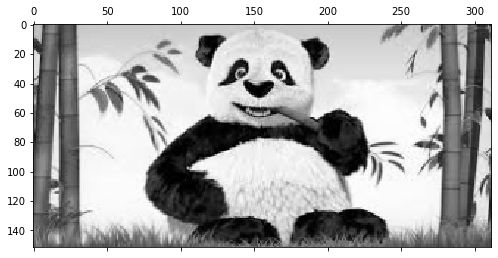

In [ ]:

Huffman,Dictionary,hight,width,image=jpeg_encoder("images.jpg",1)

In [ ]:
a=jpeg_decoder(Huffman,Dictionary,hight,width)

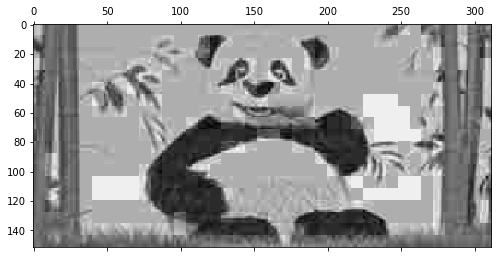

In [ ]:
plt.matshow(a);

**Compresion Ratio**

In [ ]:
c1=0
for i in Huffman:
    c1+=len(i)
c2=0
for j in Dictionary:
    c2+=len(j)
Huffman_bits=c1+c2
Image_size_bits=hight.bit_length()+width.bit_length()

In [ ]:
Comprissed=Image_size_bits+Huffman_bits
Comprissed=(Comprissed)/(1024*1024*8)
print("the size of the Compressed Image={:0.3f} KB".format(Comprissed*1024))

the size of the Compressed Image=1.416 KB


In [ ]:
Original=width*hight*8 
Original= (Original)/(1024*1024*8)
print("the size of the Original Image={:0.3f} KB".format(Original*1024))

the size of the Original Image=46.312 KB


**The Algorithem commpressed the image from 48.75 KB to 1.172 KB 
Which is about 10:0.2 (achive specifcs)**

**Quality**

In [ ]:
(score, diff) = compare_ssim(a, image, full=True)
diff = (diff * 255).astype("uint8")

# 6. You can print only the score if you want
print("SSIM: {}".format(score))

SSIM: 0.4541982446712788


**This does not acieve the specifcs**

# Table 4

In [ ]:
quntization=[  [200,  11,  10,  16,  24,  40,  51,  61],  
             [12,  12,  14,  19,  26,  58,  60,  55],  
             [14,  13,  16,  24,  40,  57,  69,  56],  
             [14,  17,  22,  29,  51,  87,  80,  62],  
             [18,  22,  37,  56,  68, 109, 103,  77],  
             [24,  35,  55,  64,  81, 104, 113,  92],  
             [49,  64,  78,  87, 103, 121, 120, 101],  
             [72,  92,  95,  98, 112, 100, 103,  99]]

240 208


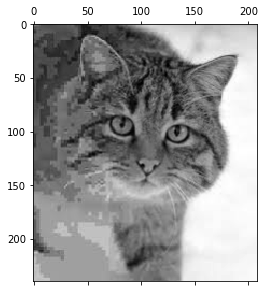

In [ ]:
Huffman,Dictionary,hight,width,image=jpeg_encoder("download.jpg",1)

In [ ]:
a=jpeg_decoder(Huffman,Dictionary,hight,width)

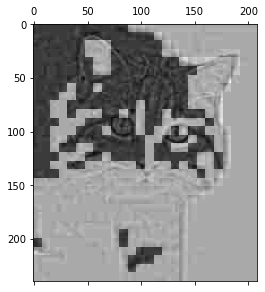

In [ ]:
plt.matshow(a);

**Compresion Ratio**

In [ ]:
c1=0
for i in Huffman:
    c1+=len(i)
c2=0
for j in Dictionary:
    c2+=len(j)
Huffman_bits=c1+c2
Image_size_bits=hight.bit_length()+width.bit_length()

In [ ]:
Comprissed=Image_size_bits+Huffman_bits
Comprissed=(Comprissed)/(1024*1024*8)
print("the size of the Compressed Image={:0.3f} KB".format(Comprissed*1024))

the size of the Compressed Image=1.169 KB


In [ ]:
Original=hight*width*8 
Original= (Original)/(1024*1024*8)
print("the size of the Original Image={:0.3f} KB".format(Original*1024))

the size of the Original Image=48.750 KB


**The Algorithem commpressed the image from 48.75 KB to 0.114 KB 
Which is about 10:0.2 ( achive specifcs)**

**Quality**

In [ ]:
(score, diff) = compare_ssim(a, image, full=True)
diff = (diff * 255).astype("uint8")

# 6. You can print only the score if you want
print("SSIM: {}".format(score))

SSIM: 0.19584547609933428


Very baad quality

# Table 5

In [ ]:
quntization=[  [1,  1,  1,  1,  1,  1,  6,  7],
              [1,  1,  1,  1,  1,  6,  7,  4],
              [1,  1,  1,  1,  6,  7,  4,  5],
              [1,  1,  1,  6,  7,  4,  5,  8],
              [1,  1,  6,  7,  4,  5,  8,  9],
              [1,  6,  7,  4,  5,  8,  9,  2],
              [6,  7,  4,  7,  6,  9,  3,  3],
              [7,  4,  5,  8,  3,  2,  4,  4]]

320 640


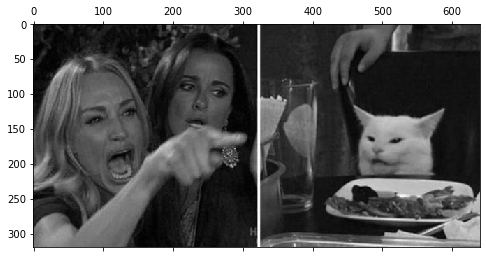

In [ ]:
Huffman,Dictionary,hight,width,image=jpeg_encoder("catmeme.jpg",1)

In [ ]:
a=jpeg_decoder(Huffman,Dictionary,hight,width)

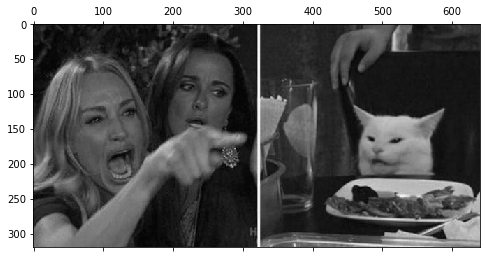

In [ ]:
plt.matshow(a);

**Compresion Ratio**

In [ ]:
c1=0
for i in Huffman:
    c1+=len(i)
c2=0
for j in Dictionary:
    c2+=len(j)
Huffman_bits=c1+c2
Image_size_bits=hight.bit_length()+width.bit_length()

In [ ]:
Comprissed=Image_size_bits+Huffman_bits
Comprissed=(Comprissed)/(1024*1024*8)
print("the size of the Compressed Image={:0.3f} KB".format(Comprissed*1024))

the size of the Compressed Image=11.414 KB


In [ ]:
Original=hight*width*8 
Original= (Original)/(1024*1024*8)
print("the size of the Original Image={:0.3f} KB".format(Original*1024))

the size of the Original Image=200.000 KB


**The Algorithem commpressed the image from 48.75 KB to 3.311 KB 
Which is about 10:0.68 ( achive specifcs)**

**Quality**

In [ ]:
(score, diff) = compare_ssim(a, image, full=True)
diff = (diff * 255).astype("uint8")

# 6. You can print only the score if you want
print("SSIM: {}".format(score))

SSIM: 0.9747192477368571


**Finally achive the spesifics**

# Conclusion

**Table 5 is the best one to achieve the the specifcs**